# Árboles de Decisión ![](https://pbs.twimg.com/profile_images/963902904611434496/ARxWWYsu_200x200.jpg)

## Algo de Teoría

Digamos que queremos intentar predecir la altura de una persona a partir de la edad.

Para esto contamos con un registro de todos los asistentes a este curso que y en el mismo encontramos su edad y su estatura.

Utilizando estos datos vamos a armar un modelo que para el dato de edad de una nueva persona que se unió al curso prediga la estatura.

Si queremos hacer predicciones (cuantitativas) sabemos (del colegio?) que un posible método a utilizar es una **regresión lineal**

![](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

Expresando matemáticamente el modelo tendría la siguiente forma
$$
Y = \beta_{0} + \beta_{1}X + \varepsilon
$$

Esto es un _modelo paramétrico_ donde hemos reducido al problema a estimar un conjunto de parámetros $\beta_{1}$ y $\beta_{0}$ (pendiente y ordenada al origen en la fórmula de arriba) en base a los datos conocidos.

Una vez que calculamos $\beta_{1}$ y $\beta_{0}$ podemos realizar predicciones para nuevos individuos.

¿Qué sucede cuando tenemos muchas variables y estas variable interactúan de forma no lineal entre ellas? 
El esquema rígido de arriba no parece ideal...

![](https://imgs.xkcd.com/comics/linear_regression.png)

Un posible modelo alternativo (no parámetrico) sería construir un **árbol de decisión**.

![](https://upload.wikimedia.org/wikipedia/commons/7/75/Representa.arbol.decision.PNG)

## Ejemplo práctico

Supongamos que queremos predecir los gastos médicos de un paciente basándonos en la edad y el índice de masa corporal de los pacientes (como en la figura de abajo).

Para construir un modelo de árbol de decisión que nos permita realizar esta predicción debemos seguir los siguientes pasos:

- Definir un conjunto de regiones diviendo los pacientes por sus valores en alguno de estos atributos.
- Dentro de las regiones resultantes tomar como valor predicho de los gastos de un paciente al promedio de los gastos de todos los pacientes en esa region. Formalmente $$\hat{y} = \hat{f}(X) = \sum_{1}^{M}c_{m}I_{X \in R_{m}}$$
- A su vez se puede continuar iterando este algoritmo elegiendo otro atributo o el mismo y particionando cada región en subregiones.


Este particionamiento define o puede ser representado como una estructura de _árbol_:
  - Las regiones son los nodos terminales u hojas
  - Los valores utilizados para partir al espacio de atributos son los nodos internos.
  - Las aristas que conectan los nodos son las ramas.

![](https://raw.githubusercontent.com/petobens/introduccion-ml-aplicado/master/figures/decision-tree/tree_regions.png)

![](https://raw.githubusercontent.com/petobens/introduccion-ml-aplicado/master/figures/decision-tree/simple_tree.png)


¿Cómo definimos un poco más formalmente las regiones para construir un árbol?

Buscamos "rectangulos" (o cajas) $R_{1}, R_{2}, \cdots, R_{J}$ que minimicen el ECM
    $$
    \sum_{j=1}^{J}\sum_{i\in R_{j}}(y_{i} - \hat{y}_{R_{j}})^{2}
    $$

Para ello hacemos tomamos un enfoque _top-down_ y _greedy_ (empezamos con todas las observaciones en una única región y en cada etapa hacemos la mejor partición posible)

1. Elegimos la variable $X_{j}$ y punto de corte $s$ tal que partir el espacio de atributos en regiones $\{X|X_{j} < s\}$ y $\{X|X_{j} >= s\}$ minimice el ECM
2. Repetimos 1. para cada sub-region resultante hasta cumplir algún criterio de parada (por ejemplo una cota mínima de observaciones en cada región)


## Puesta en práctica

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [0]:
# Obtenemos el dataset del repositorio original del libro
URL = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(URL)

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
TARGET = 'charges'
SEED = 1234

# features (variables independientes)
X = df[[c for c in df.columns if c != TARGET]]
# target (variable dependiente)
y = df[TARGET]

In [0]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Entrenar el modelo

In [0]:
# Transformo los features y realizo un split para conformar los datasets de 
# train y test
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

In [0]:
??DecisionTreeRegressor

In [0]:
regr = DecisionTreeRegressor(max_depth=2, random_state=SEED)
regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [0]:
# Qué pasa si corremos esto?
#print(regr.get_depth())

NotFittedError: ignored

In [0]:
fregr = regr.fit(X_train, y_train)
fregr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [0]:
fregr.get_depth()

2

### Evaluar el modelo resultante

In [0]:
# Scoreando la performance del modelo

y_pred_train = fregr.predict(X_train)
y_pred_test = fregr.predict(X_test)
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))


0.8271247720318773
0.8257738371744588


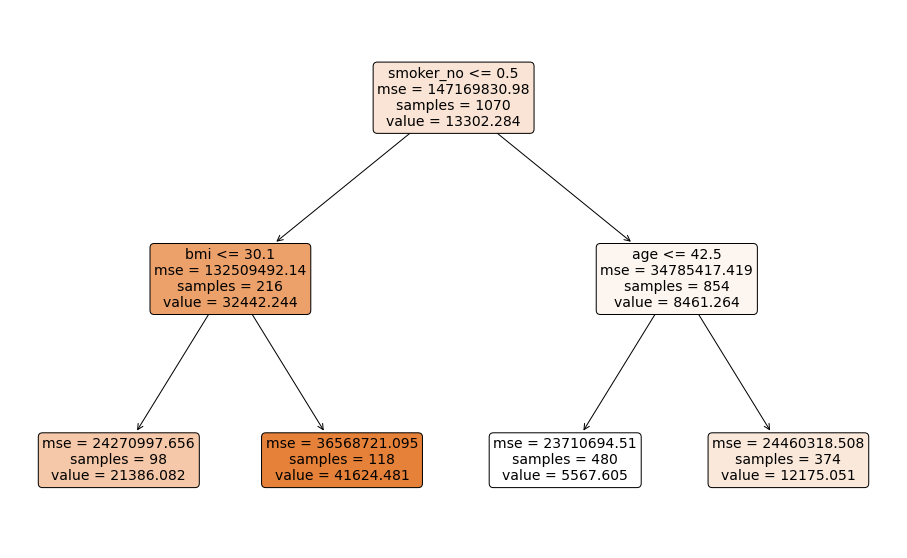

In [0]:
# Visualizando el árbol resultante
plt.figure(figsize=(16, 10))
plot_tree(
    fregr, max_depth=2, feature_names=X.columns, filled=True, rounded=True, fontsize=14
)
plt.show()

In [0]:
### Feature importance

importances = fregr.feature_importances_
indices = np.argsort(importances)[::-1]
feat_imp = list(zip(np.asanyarray(X.columns)[indices], importances[indices]))
feat_imp_df = pd.DataFrame(feat_imp, columns=['feature', 'importance'])
print(feat_imp_df)

             feature  importance
0          smoker_no    0.761181
1                bmi    0.168358
2                age    0.070461
3   region_southwest    0.000000
4   region_southeast    0.000000
5   region_northwest    0.000000
6   region_northeast    0.000000
7         smoker_yes    0.000000
8           sex_male    0.000000
9         sex_female    0.000000
10          children    0.000000


In [0]:
! pip install dtreeviz


  Created wheel for dtreeviz: filename=dtreeviz-0.8.2-cp36-none-any.whl size=24505 sha256=38c626389293f304ef927f82070b664a5678ced7c03c2d686d6f6a765c7f50a2
  Stored in directory: /root/.cache/pip/wheels/a2/da/b1/3178bb2b10647b5a6340c1979987e3b0c3b993cb674b0a3dcc
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


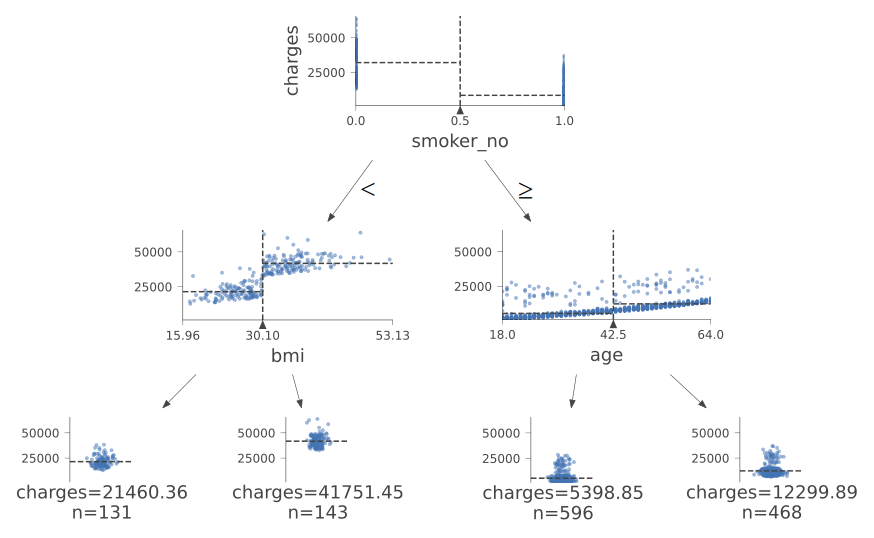

In [0]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(fregr,
               X,
               y,
               target_name='charges',
               feature_names=X.columns,
               scale=2)
              
viz            

In [0]:

for c in ["mse", "friedman_mse", "mae"]:
  for i in range(2,6):
    regr2 = DecisionTreeRegressor(criterion=c, max_depth=i)
    fregr2 = regr2.fit(X_train,y_train)
    y_pred_train = fregr2.predict(X_train)
    y_pred_test = fregr2.predict(X_test)
    r2_train = round(r2_score(y_train, y_pred_train),5)
    r2_test = round(r2_score(y_test, y_pred_test),5)
    print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')



criterion: mse - max_depth: 2 => r2_train: 0.82712 - r2_test: 0.82577
criterion: mse - max_depth: 3 => r2_train: 0.85607 - r2_test: 0.85404
criterion: mse - max_depth: 4 => r2_train: 0.8685 - r2_test: 0.8502
criterion: mse - max_depth: 5 => r2_train: 0.88508 - r2_test: 0.82407
criterion: friedman_mse - max_depth: 2 => r2_train: 0.82712 - r2_test: 0.82577
criterion: friedman_mse - max_depth: 3 => r2_train: 0.85607 - r2_test: 0.85404
criterion: friedman_mse - max_depth: 4 => r2_train: 0.8685 - r2_test: 0.8502
criterion: friedman_mse - max_depth: 5 => r2_train: 0.88508 - r2_test: 0.82407
criterion: mae - max_depth: 2 => r2_train: 0.81861 - r2_test: 0.81797
criterion: mae - max_depth: 3 => r2_train: 0.84124 - r2_test: 0.84742
criterion: mae - max_depth: 4 => r2_train: 0.85261 - r2_test: 0.85189
criterion: mae - max_depth: 5 => r2_train: 0.86351 - r2_test: 0.83622



## ¿Qué ventajas y desventajas tienen los árboles de decisión?
- Podemos (por construcción) rankear los atributos de acuerdo a la reduccion en EMC e identificar a los más relevantes
- Son fáciles de interpretar (en la medida que no sean excesivamente profundos)
- Buen manejo de no linealidades y atributos categóricos (depende de la implementación)
- Carecen de gran capacidad predictiva
- Muy sensibles a pequeños cambios en los datos de entrenamiento


Versus modelo lineales son siempre mejores? **No necesariamente...**

![](https://raw.githubusercontent.com/petobens/introduccion-ml-aplicado/master/figures/decision-tree/linear_vs_dt.png)

## Obteniendo el Dataset de Kaggle

Este dataset se encuentra disponible también en Kaggle. Vamos a aprender como utilizar la librería de Kaggle para obtenerlo ya que la vamos a utilizar para los próximos ejercicios.

### Obtener el archivo con la API Key de Kaggle
Dirigirse a https://www.kaggle.com/ y registrarse si no tienen un usuario pre-existente.
Luego del login, en la parte de arriba a la derecha de la pantalla se ve la foto de perfil de nuestro usuario.
Click allí y luego click en `My Account` y scrollear a la sección `API`
![Get Kaggle API Key](https://miro.medium.com/max/1400/1*rsqWlvLzJZ2cNy8wR4it-g.png)
Click en `Create NEW API Token` y se bajará un archico con nombre `kaggle.json` que contiene las API keys.





In [0]:
# Al ejecutar este snippet se puede subir un archivo desde nuestro disco rígido
# Subir el archivo kaggle.json que tiene las API keys de Kaggle 
from google.colab import files
files.upload()


In [0]:
# Instalar la librería de Kaggle
!pip install -q kaggle

In [0]:
# Crear un directorio temporal y almacenar allí el archivo con las keys de 
# Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
# Verificar que la API key funciona correctamente listando los kernels de 
# nuestro usuario.
!kaggle kernels list --user juanpampliega --sort-by dateRun

ref                                                  title                                   author                 lastRunTime          totalVotes  
---------------------------------------------------  --------------------------------------  ---------------------  -------------------  ----------  
juanpampliega/exercise-underfitting-and-overfitting  Exercise: Underfitting and Overfitting  Juan Martin Pampliega  2020-05-11 04:38:32           0  
juanpampliega/exercise-explore-your-data             Exercise: Explore Your Data             Juan Martin Pampliega  2020-05-01 17:54:47           0  
juanpampliega/exercise-predicting-stock-prices       Exercise: Predicting Stock Prices       Juan Martin Pampliega  2018-11-28 12:22:20           0  


### Obtener comando para bajar un dataset
![Download Dataset Command](https://miro.medium.com/max/1400/1*EgvWkUzP0lMoDvxF6tBJLg.png)

In [0]:
# Bajar el dataset que vamos a utilizar para este notebook
!kaggle datasets download -d mirichoi0218/insurance


  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 28.2MB/s]


In [0]:
# Verificar que tenemos el dataset 
!ls insurance.zip

insurance.zip


In [0]:
df = pd.read_csv("insurance.zip")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Ejercicios

1. Utilice la clase [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) para transformar atributos categóricos en atributos numéricos y vuelva a fittear el árbol de decisión.
2. Altere la semilla empleada para splitear los datos y vuelva a construir el árbol. ¿Varían mucho o poco sus resultados?
3. Encapsule la lógica de obtención de feature importance en una función y utilice esta función para realizar un gráfico de barras con la importancia (ordenada) de atributos del modelo con mayor profundidad.
4. Emplee ahora un modelo de [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para predecir los gastos médicos. Compare estas predicciones con las obtenidas anteriormente. Rehaga la comparación para árboles con distintas profundidades.
5. Aplique lo aprendido en este notebook para predicir el precio de casas de Sidney en el siguiente dataset. https://www.kaggle.com/shree1992/housedata
Investigue distintas opciones de parámetros del modelo y trate de buscar la opción óptima. Cómo determina cual es la opción óptima de combinación de parámetros? 
Calcule *feature importance.*
